In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/used car.csv")

In [ ]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [ ]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [ ]:
df.shape

(852122, 8)

**Checking Null Values**

In [ ]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

**Checking Duplicates and Remove Them**

In [ ]:
df.duplicated().sum()

30

In [ ]:
df[df.duplicated()]

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120953,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120954,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120955,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120956,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120957,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
df['Age'] = pd.datetime.now().year - df['Year']

In [ ]:
df.shape

(852062, 9)

**Checking Unique Values**

In [ ]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852045
Make           58
Model        2736
Age            22
dtype: int64

In [ ]:
df['City'].unique()

array(['El Paso', 'Long Island City', 'Windsor', ..., 'Winslow',
       'Bergenfield', 'Belmont'], dtype=object)

In [ ]:
df['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [ ]:
df['Make'].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
df['Model'].unique()

array(['ILX6-Speed', 'ILX5-Speed', 'ILXAutomatic', ..., 'V90', 'XC90T8',
       'V60Polestar'], dtype=object)

In [ ]:
df['Vin'].unique()

array(['19VDE2E53EE000083', '19VDE1F52DE012636', '19VDE2E52DE000025', ...,
       'YV4A22PL4G1000868', 'YV4A22NLXH1006162', 'YV4BC0ZX1H1109845'],
      dtype=object)

In [ ]:
df['Age'].unique()

array([ 9, 10,  7, 11, 14,  8, 13, 12, 16, 17, 15, 19,  6, 18, 20, 21, 24,
       22, 23, 25,  5, 26])

Create Numeric Columns

In [ ]:
Num_Col = ['Price','Year','Mileage','Age']

Create Categorical Columns

In [ ]:
Cat_Col = ['City','State','Make','Model']

In [ ]:
df.drop('Vin',axis=1,inplace=True)

In [ ]:
df.head()

,Price,Year,Mileage,City,State,Make,Model,Age
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,9
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,10
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,10
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,9
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,7


Maximum Car Price



In [ ]:
df[df['Price']==df['Price'].max()]

,Price,Year,Mileage,City,State,Make,Model,Age
622265,499500,2014,3260,Westville,NJ,Mercedes-Benz,SLS,9


Minimum Car Price

In [ ]:
Min_Price = df[df['Price']==df['Price'].min()]  ## 1500 price, 85 rows

Maximum Car Mileage

In [ ]:
df[df['Mileage']==df['Mileage'].max()]

,Price,Year,Mileage,City,State,Make,Model,Age
186465,4933,2002,2856196,Hayward,CA,Chevrolet,Suburban4dr,21


Minimum Car Mileage

In [ ]:
Min_Mileage = df[df['Mileage']==df['Mileage'].min()] ## Mileage 5, 350 rows

# Boxplot to checking Outliers


columns Price


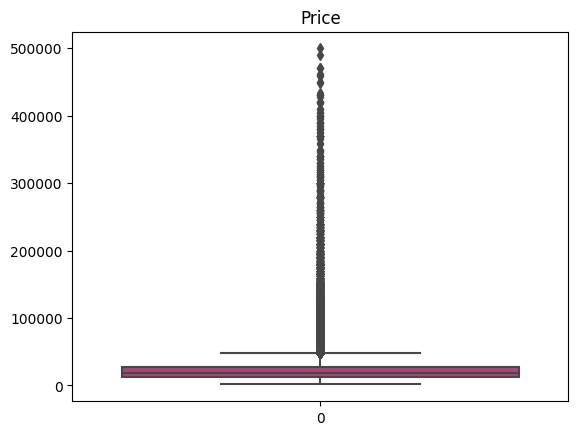


columns Year


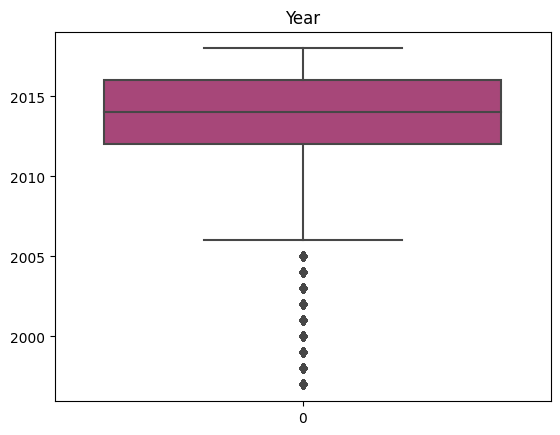


columns Mileage


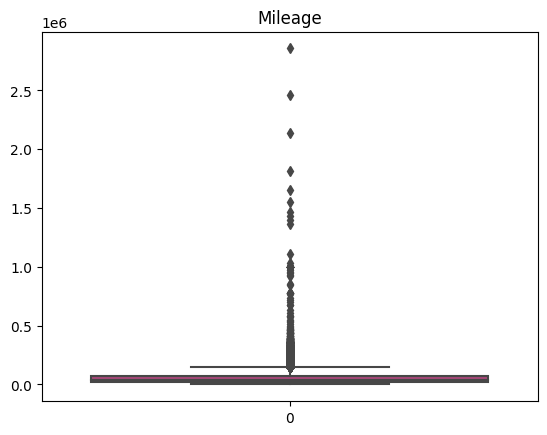


columns Age


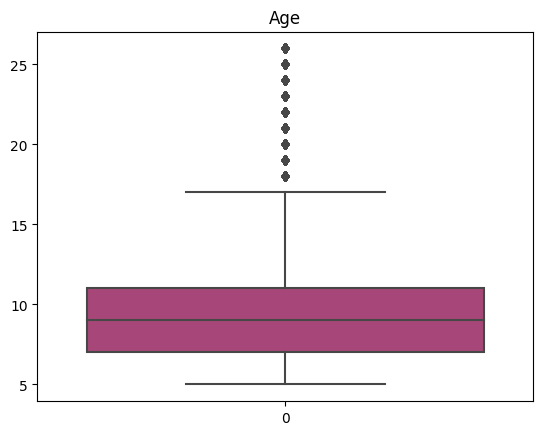

In [ ]:
for j in Num_Col:
  print('columns',j)
  sns.boxplot(df[j],palette='magma')
  plt.title(j)
  plt.show()
  print('')

# Removing Outlier by IQR Method

In [ ]:
Q3_Price = df['Price'].quantile(0.75)
Q1_Price = df['Price'].quantile(0.25)

IQR_Price= Q3_Price - Q1_Price

UL_Price = Q3_Price + IQR_Price*1.5
LL_Price = Q1_Price - IQR_Price*1.5

df1= df[(df['Price']>LL_Price) & (df['Price']<UL_Price)]

In [ ]:
df1.shape

(824037, 8)

In [ ]:
Q3_Mileage = df1['Mileage'].quantile(0.75)
Q1_Mileage = df1['Mileage'].quantile(0.25)

IQR_Mileage = Q3_Mileage - Q1_Mileage

UL_Mileage = Q3_Mileage + IQR_Mileage*1.5
LL_Mileage = Q1_Mileage - IQR_Mileage*1.5

df2= df1[(df1['Mileage']>LL_Mileage) & (df1['Mileage']<UL_Mileage)]

In [ ]:
#Q3_Year = df1['Year'].quantile(0.75)
#Q1_Year = df1['Year'].quantile(0.25)

#IQR_Year= Q3_Year - Q1_Year

#UL_Year= Q3_Year + IQR_Year*1.5
#LL_Year = Q1_Year - IQR_Year*1.5

#df2= df1[(df1['Year']>LL_Year) & (df1['Year']<UL_Year)]

<Axes: >

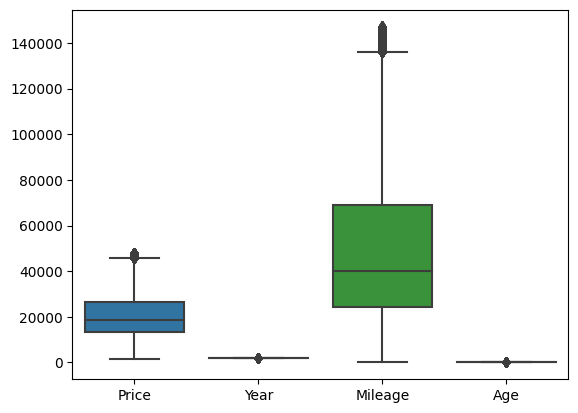

In [ ]:
sns.boxplot(df2)

In [ ]:
df2.shape

(794727, 8)

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df3 = df2[Cat_Col].apply(LE.fit_transform)
df2.drop(Cat_Col, axis=1, inplace=True)
df2 = pd.concat([df3,df2],axis=1)

In [ ]:
df2.head()

,City,State,Make,Model,Price,Year,Mileage,Age
0,646,49,1,1060,8995,2014,35725,9
1,1259,39,1,1059,10888,2013,19606,10
2,646,49,1,1060,8995,2013,48851,10
3,2489,6,1,1059,10999,2014,39922,9
4,1230,50,1,1062,14799,2016,22142,7


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794727 entries, 0 to 852112
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   City     794727 non-null  int64
 1   State    794727 non-null  int64
 2   Make     794727 non-null  int64
 3   Model    794727 non-null  int64
 4   Price    794727 non-null  int64
 5   Year     794727 non-null  int64
 6   Mileage  794727 non-null  int64
 7   Age      794727 non-null  int64
dtypes: int64(8)
memory usage: 54.6 MB


columns Price


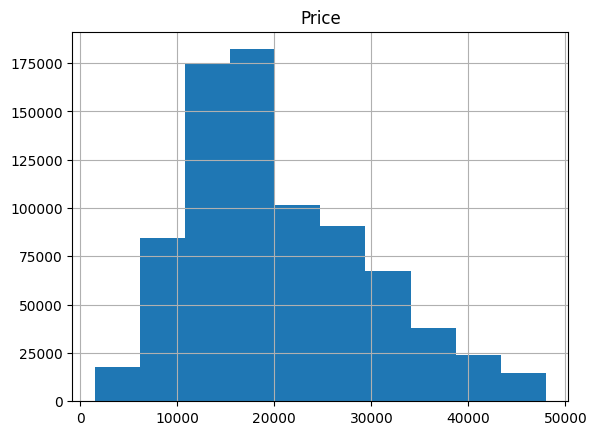

columns Year


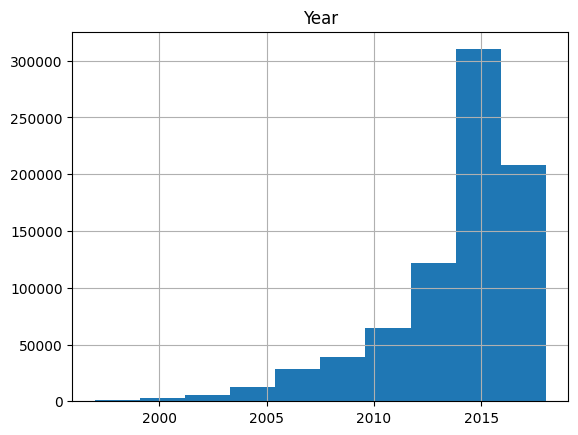

columns Mileage


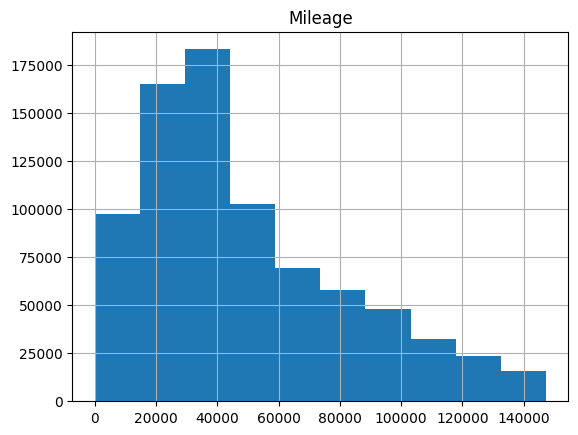

columns Age


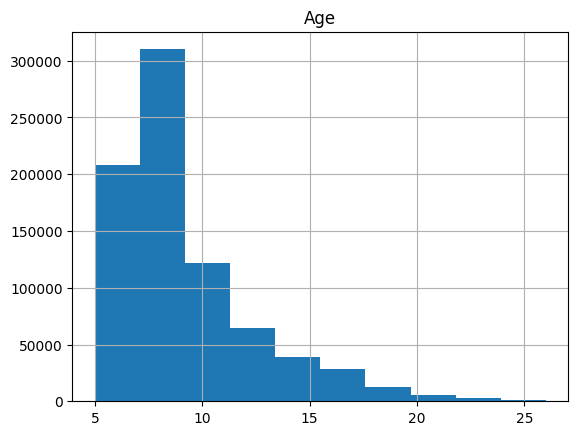

In [ ]:
for H in Num_Col:
 print('columns',H)
 df2[H].hist()
 plt.title(H)
 plt.show()

columns Price


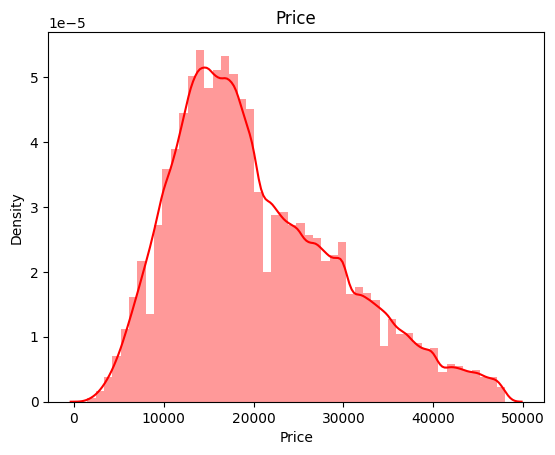


columns Year


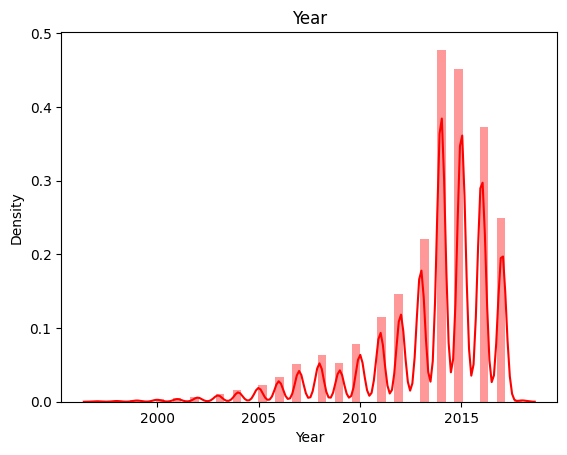


columns Mileage


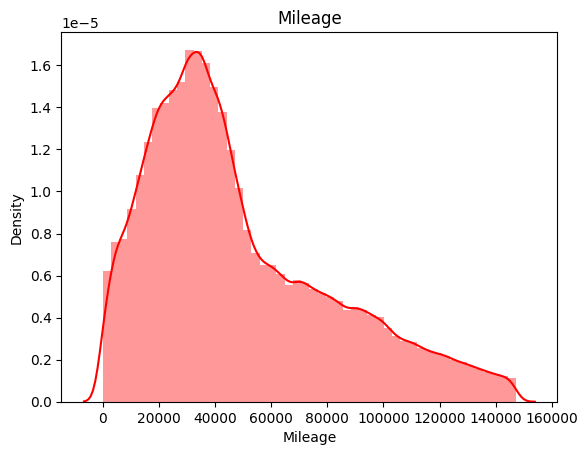


columns Age


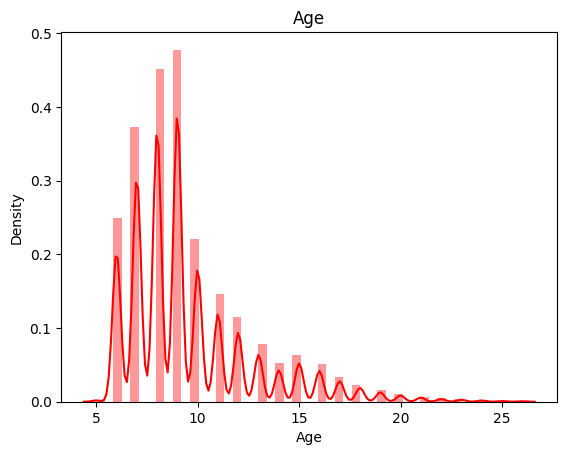

In [ ]:
for d in Num_Col:
  print('columns',d)
  sns.distplot(df2[d],color='Red')
  plt.title(d)
  plt.show()
  print('')

<Figure size 1400x400 with 0 Axes>

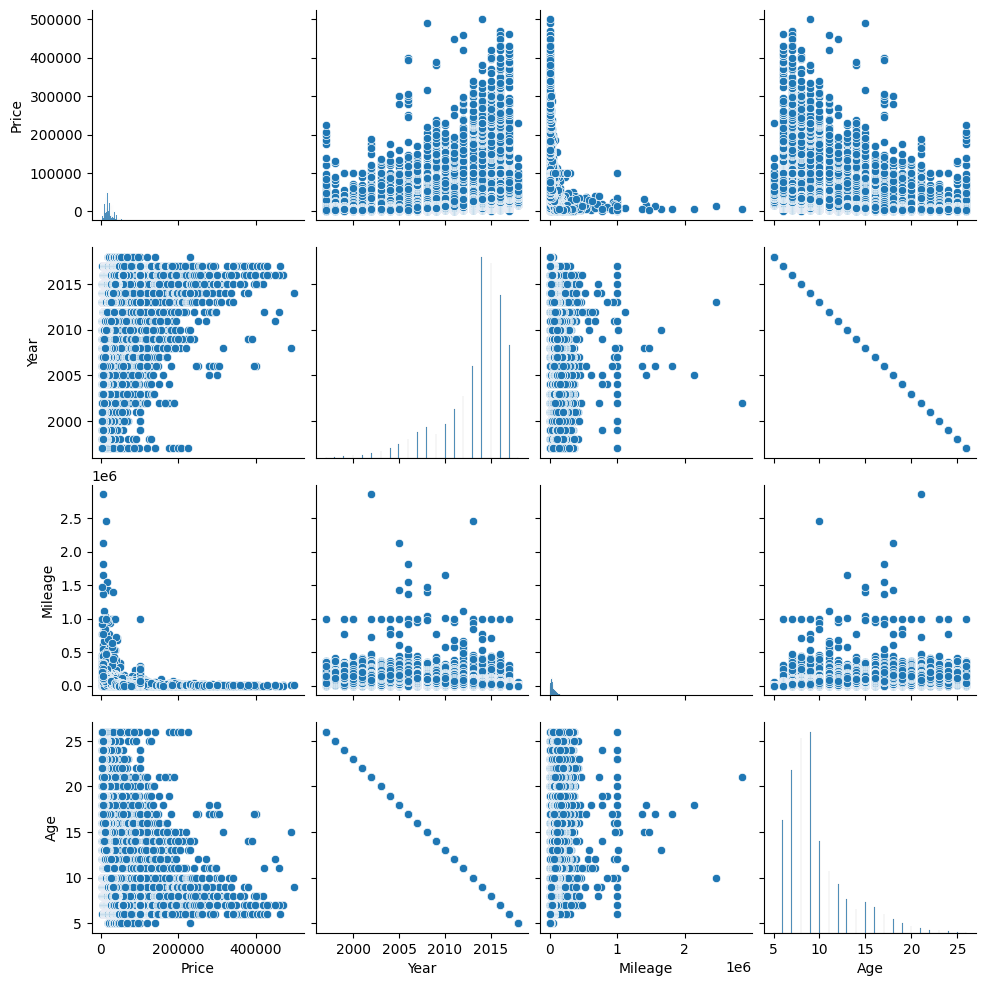

In [ ]:
plt.figure(figsize=(14,4))
sns.pairplot(df)

<Axes: >

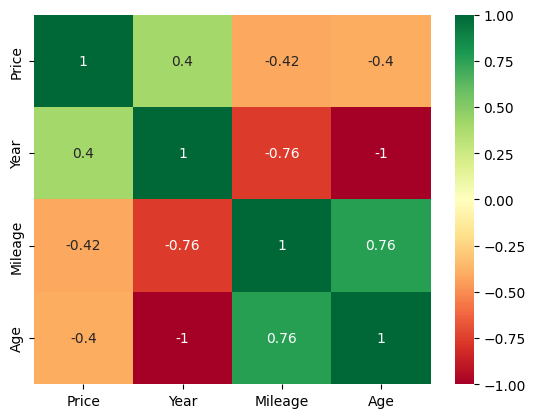

In [ ]:
sns.heatmap(df.corr(),vmin=-1,cmap='RdYlGn',vmax=1,annot=True)

**Dependent And Independent Variable**

In [ ]:
x = df2.drop(['Price'],axis=1)
y = df2['Price']

# **Training Model Into Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(556308, 7)
(238419, 7)
(556308,)
(238419,)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb  # Make sure you have xgboost installed
from sklearn.neural_network import MLPRegressor

In [ ]:
models = {
    'MLR': LinearRegression(),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'ridgeregularization': Ridge(),
    'randomforest': RandomForestRegressor(),
    'neuralnetwork': MLPRegressor(),  # Replace with your actual neural network model
    'supportvector': SVR(),
    'knn': KNeighborsRegressor(),
    'gradientboosting': GradientBoostingRegressor(),
    'adaboosting': AdaBoostRegressor(),
    'xgboosting': xgb.XGBRegressor()  # Make sure you have xgboost installed
}



In [ ]:
def evaluation(model_name, model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {model_name}")
    print("r2 score:", metrics.r2_score(y_test, y_pred))

    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", rmse)

    # Calculate and print MAE
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)

    # Calculate and print MAPE
    mape = np.mean(np.abs((y_test - y_pred) / (y_test))) * 100
    print("Mean Absolute Percentage Error (MAPE):", mape, "%")

    print("\n")

In [ ]:
for model_name, model in models.items():
    evaluation(model_name, model)

Model: MLR
r2 score: 0.27815284293886056
Root Mean Squared Error (RMSE): 7870.559283908947
Mean Absolute Error (MAE): 6348.05123245774
Mean Absolute Percentage Error (MAPE): 36.133627830056916 %


Model: LinearRegression
r2 score: 0.27815284293886056
Root Mean Squared Error (RMSE): 7870.559283908947
Mean Absolute Error (MAE): 6348.05123245774
Mean Absolute Percentage Error (MAPE): 36.133627830056916 %


Model: DecisionTree
r2 score: 0.8267163679500834
Root Mean Squared Error (RMSE): 3856.219447091055
Mean Absolute Error (MAE): 2598.230588456586
Mean Absolute Percentage Error (MAPE): 13.969388268133098 %


Model: ridgeregularization
r2 score: 0.27815284295562015
Root Mean Squared Error (RMSE): 7870.559283817579
Mean Absolute Error (MAE): 6348.051230303575
Mean Absolute Percentage Error (MAPE): 36.13362796338165 %


Model: randomforest
r2 score: 0.9038997037456108
Root Mean Squared Error (RMSE): 2871.741422674814
Mean Absolute Error (MAE): 1966.8733162374274
Mean Absolute Percentage Erro